In [2]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [4]:
digits = datasets.load_digits()
data = digits.images.reshape(1797, 8*8)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [5]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

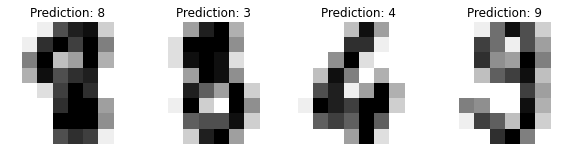

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [9]:
print(
    f"Classification report for classifier {model}: \n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...): 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.85      0.81      0.83        91
           2       0.93      0.90      0.91        86
           3       0.89      0.

Confusion matrix:
[[87  0  0  0  0  0  0  0  1  0]
 [ 0 74  1  3  2  0  0  0  1 10]
 [ 2  0 77  5  0  0  0  0  0  2]
 [ 0  4  0 75  0  2  0  4  6  0]
 [ 3  0  0  0 78  0  6  0  0  5]
 [ 0  1  0  0  0 84  1  0  0  5]
 [ 0  3  5  0  0  0 82  0  1  0]
 [ 0  0  0  0  1  3  0 84  1  0]
 [ 0  5  0  1  1  3  0  1 75  2]
 [ 2  0  0  0  0  3  0  0  2 85]]


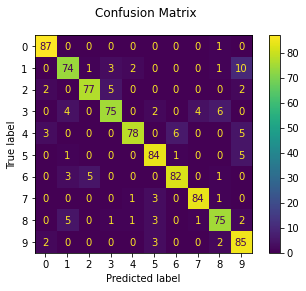

In [11]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()